In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from scipy.stats import ttest_ind
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Ready_dataset.csv")

In [3]:
df

,STATISTIC,Statistic Label,Week,Year,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,1,2019,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,1,2019,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,1,2019,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2,2019,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2,2019,1,Red line,Number,408199.0
...,...,...,...,...,...,...,...,...
775,TII03C01,Passenger Journeys,47,2023,1,Red line,Number,465137.0
776,TII03C01,Passenger Journeys,47,2023,2,Green line,Number,452163.0
777,TII03C01,Passenger Journeys,48,2023,-,All Luas lines,Number,1084541.0
778,TII03C01,Passenger Journeys,48,2023,1,Red line,Number,556742.0


In [4]:
df.tail(10)

,STATISTIC,Statistic Label,Week,Year,C03132V03784,Luas Line,UNIT,VALUE
770,TII03C01,Passenger Journeys,45,2023,2,Green line,Number,522508.0
771,TII03C01,Passenger Journeys,46,2023,-,All Luas lines,Number,1009030.0
772,TII03C01,Passenger Journeys,46,2023,1,Red line,Number,528422.0
773,TII03C01,Passenger Journeys,46,2023,2,Green line,Number,480607.0
774,TII03C01,Passenger Journeys,47,2023,-,All Luas lines,Number,917300.0
775,TII03C01,Passenger Journeys,47,2023,1,Red line,Number,465137.0
776,TII03C01,Passenger Journeys,47,2023,2,Green line,Number,452163.0
777,TII03C01,Passenger Journeys,48,2023,-,All Luas lines,Number,1084541.0
778,TII03C01,Passenger Journeys,48,2023,1,Red line,Number,556742.0
779,TII03C01,Passenger Journeys,48,2023,2,Green line,Number,527799.0


In [5]:
df.shape

(780, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        780 non-null    object 
 1   Statistic Label  780 non-null    object 
 2   Week             780 non-null    int64  
 3   Year             780 non-null    int64  
 4   C03132V03784     780 non-null    object 
 5   Luas Line        780 non-null    object 
 6   UNIT             780 non-null    object 
 7   VALUE            771 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 48.9+ KB


In [7]:
df.isnull().sum()

STATISTIC          0
Statistic Label    0
Week               0
Year               0
C03132V03784       0
Luas Line          0
UNIT               0
VALUE              9
dtype: int64

In [8]:
df.describe(include='all')

,STATISTIC,Statistic Label,Week,Year,C03132V03784,Luas Line,UNIT,VALUE
count,780,780,780.000000,780.000000,780,780,780,7.710000e+02
unique,1,1,NaN,NaN,3,3,1,NaN
top,TII03C01,Passenger Journeys,NaN,NaN,-,All Luas lines,Number,NaN
freq,780,780,NaN,NaN,260,260,780,NaN
mean,NaN,NaN,26.538462,2020.961538,NaN,NaN,NaN,4.416531e+05
std,NaN,NaN,15.081884,1.400919,NaN,NaN,NaN,2.683211e+05
min,NaN,NaN,1.000000,2019.000000,NaN,NaN,NaN,1.972700e+04
25%,NaN,NaN,13.750000,2020.000000,NaN,NaN,NaN,2.321835e+05
50%,NaN,NaN,26.500000,2021.000000,NaN,NaN,NaN,4.258580e+05
75%,NaN,NaN,39.250000,2022.000000,NaN,NaN,NaN,5.326300e+05


In [9]:
df.dtypes

STATISTIC           object
Statistic Label     object
Week                 int64
Year                 int64
C03132V03784        object
Luas Line           object
UNIT                object
VALUE              float64
dtype: object

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

STATISTIC          0
Statistic Label    0
Week               0
Year               0
C03132V03784       0
Luas Line          0
UNIT               0
VALUE              0
dtype: int64

In [12]:
# Descriptive statistics for passenger journeys
passenger_journeys_stats = df['VALUE'].describe()

# Calculate mean, median, and standard deviation separately
mean_passenger_journeys = df['VALUE'].mean()
median_passenger_journeys = df['VALUE'].median()
std_passenger_journeys = df['VALUE'].std()

# Display descriptive statistics
print("Descriptive Statistics for Passenger Journeys:")
print(passenger_journeys_stats)

# Display mean, median, and standard deviation
print("\nMean Passenger Journeys:", mean_passenger_journeys)
print("Median Passenger Journeys:", median_passenger_journeys)
print("Standard Deviation of Passenger Journeys:", std_passenger_journeys)


Descriptive Statistics for Passenger Journeys:
count    7.710000e+02
mean     4.416531e+05
std      2.683211e+05
min      1.972700e+04
25%      2.321835e+05
50%      4.258580e+05
75%      5.326300e+05
max      1.173473e+06
Name: VALUE, dtype: float64

Mean Passenger Journeys: 441653.1271076524
Median Passenger Journeys: 425858.0
Standard Deviation of Passenger Journeys: 268321.0714045732


In [13]:
unrealistic_values = df[df['VALUE'] < 0]
print("Unrealistic Values:")
print(unrealistic_values)

Unrealistic Values:
Empty DataFrame
Columns: [STATISTIC, Statistic Label, Week, Year, C03132V03784, Luas Line, UNIT, VALUE]
Index: []



Descriptive Statistics for Dataset 1:


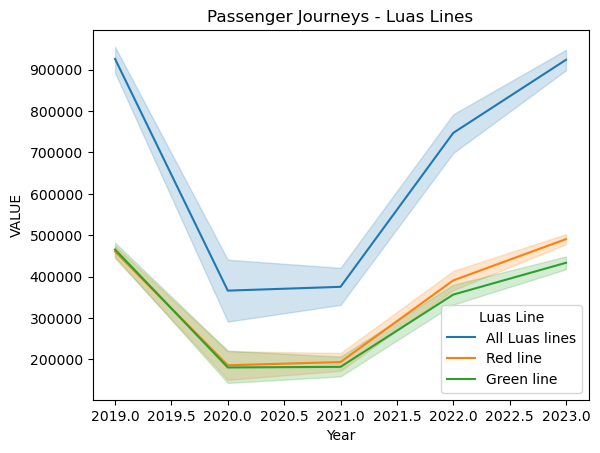

In [14]:
# Descriptive statistics
print("\nDescriptive Statistics for Dataset 1:")

# Visualizations
sns.lineplot(x='Year', y='VALUE', hue='Luas Line', data=df)
plt.title('Passenger Journeys - Luas Lines')
plt.show()


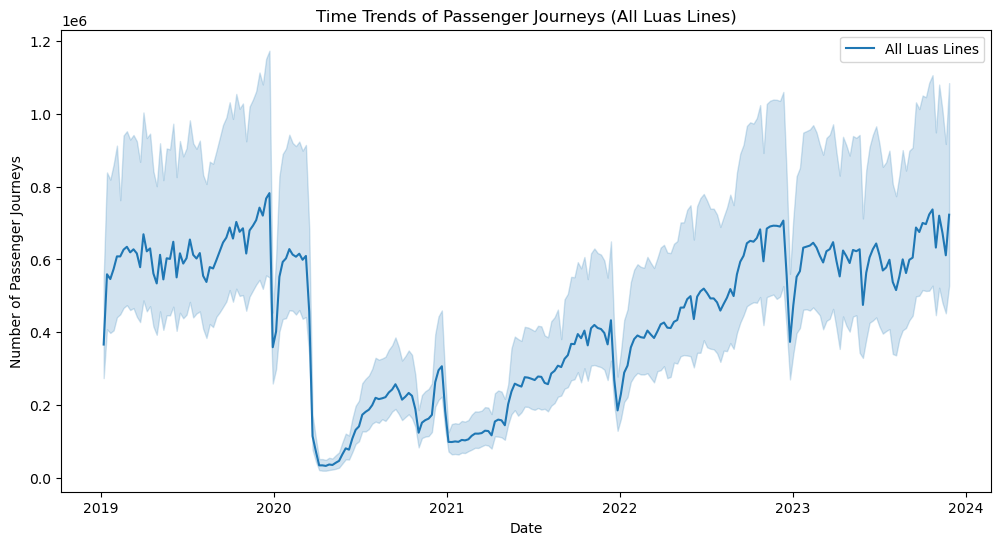

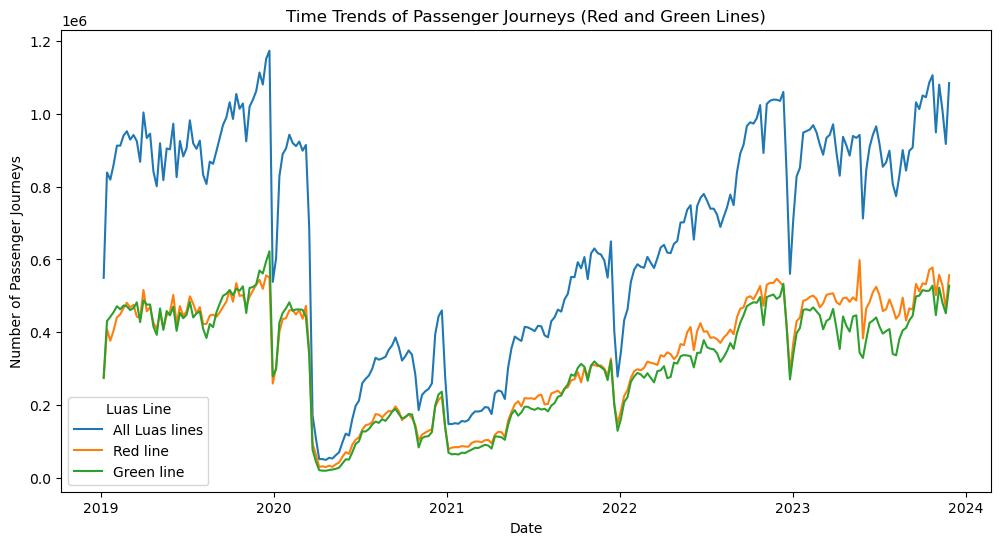

In [15]:
# If your DataFrame has a 'Week' and 'Year' column, you can create a 'Date' column for better plotting
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Week'].astype(str) + '-1', format='%Y%U-%w')

# Line chart for overall passenger journeys
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='VALUE', data=df, label='All Luas Lines')
plt.title('Time Trends of Passenger Journeys (All Luas Lines)')
plt.xlabel('Date')
plt.ylabel('Number of Passenger Journeys')
plt.show()

# Line chart for each Luas line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='VALUE', hue='Luas Line', data=df)
plt.title('Time Trends of Passenger Journeys (Red and Green Lines)')
plt.xlabel('Date')
plt.ylabel('Number of Passenger Journeys')
plt.legend(title='Luas Line')
plt.show()


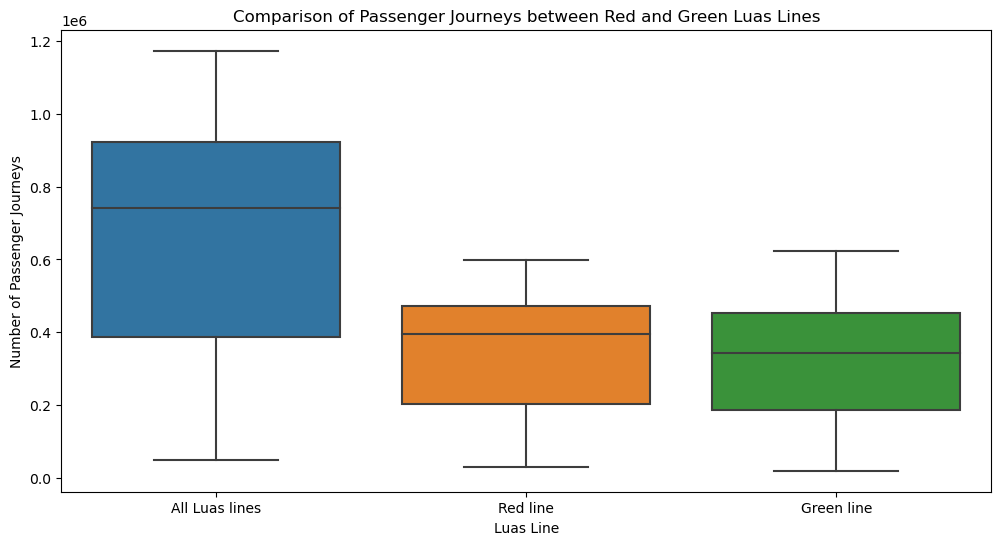

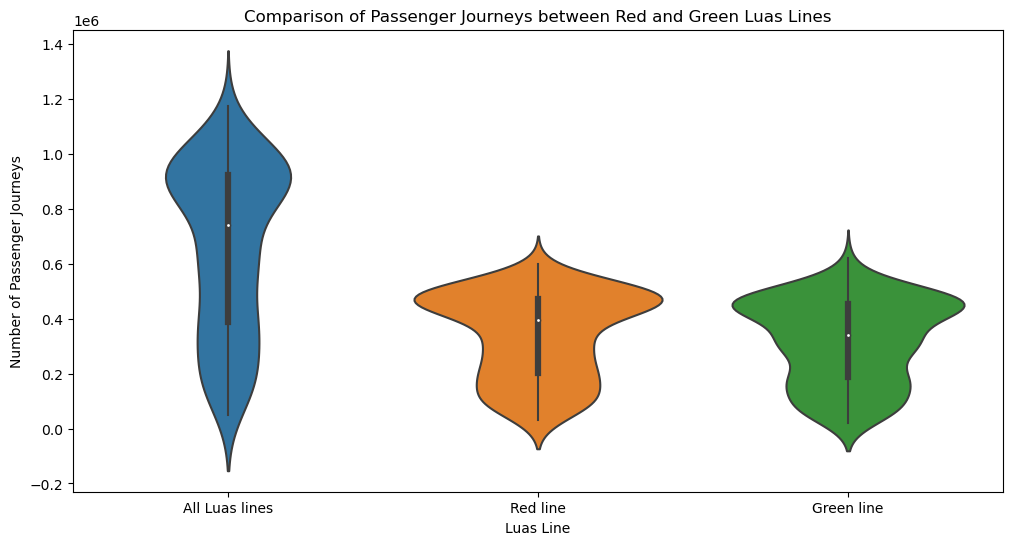

Summary Statistics for Red Line:
count       257.000000
mean     341277.245136
std      156784.451033
min       29666.000000
25%      202202.000000
50%      394475.000000
75%      472655.000000
max      598293.000000
Name: VALUE, dtype: float64

Summary Statistics for Green Line:
count       257.000000
mean     321202.463035
std      153010.863318
min       19727.000000
25%      186974.000000
50%      342392.000000
75%      453700.000000
max      622699.000000
Name: VALUE, dtype: float64


In [16]:
# Create a new DataFrame for Red Line and Green Line
red_line_df = df[df['Luas Line'] == 'Red line']
green_line_df = df[df['Luas Line'] == 'Green line']

# Summary statistics
summary_stats_red = red_line_df['VALUE'].describe()
summary_stats_green = green_line_df['VALUE'].describe()

# Visualization - Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Luas Line', y='VALUE', data=df)
plt.title('Comparison of Passenger Journeys between Red and Green Luas Lines')
plt.xlabel('Luas Line')
plt.ylabel('Number of Passenger Journeys')
plt.show()

# Visualization - Violin plot for more insights
plt.figure(figsize=(12, 6))
sns.violinplot(x='Luas Line', y='VALUE', data=df)
plt.title('Comparison of Passenger Journeys between Red and Green Luas Lines')
plt.xlabel('Luas Line')
plt.ylabel('Number of Passenger Journeys')
plt.show()

# Print summary statistics
print("Summary Statistics for Red Line:")
print(summary_stats_red)
print("\nSummary Statistics for Green Line:")
print(summary_stats_green)


In [17]:
red_line_values = df[df['Luas Line'] == 'Red line']['VALUE']
green_line_values = df[df['Luas Line'] == 'Green line']['VALUE']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(red_line_values, green_line_values, equal_var=False)

# Set significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Fail to reject the null hypothesis. There is no significant difference.


In [18]:
red_line_values = df[df['Luas Line'] == 'Red line']['VALUE']
green_line_values = df[df['Luas Line'] == 'Green line']['VALUE']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(red_line_values, green_line_values, equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("Two-sample t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Compare p-value with significance level
if p_value < alpha:
    print("\nReject the null hypothesis. There is a significant difference.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference.")


Two-sample t-test results:
T-statistic: 1.4690119815371379
P-value: 0.14244403620112306

Fail to reject the null hypothesis. There is no significant difference.


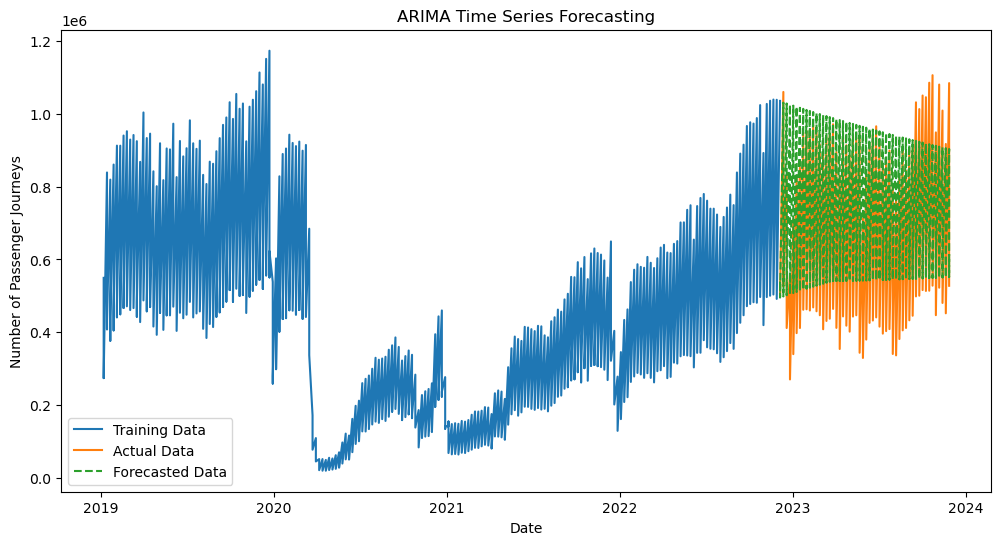

In [19]:
# Assuming 'Date' is a datetime column and 'VALUE' is the passenger journey data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
order = (5, 1, 0)  # Example order; you may need to adjust based on your data
model = ARIMA(train['VALUE'], order=order)
fit_model = model.fit()

# Forecast future values
forecast_values = fit_model.forecast(steps=len(test))

# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['VALUE'], label='Training Data')
plt.plot(test.index, test['VALUE'], label='Actual Data')
plt.plot(test.index, forecast_values, label='Forecasted Data', linestyle='--')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.show()


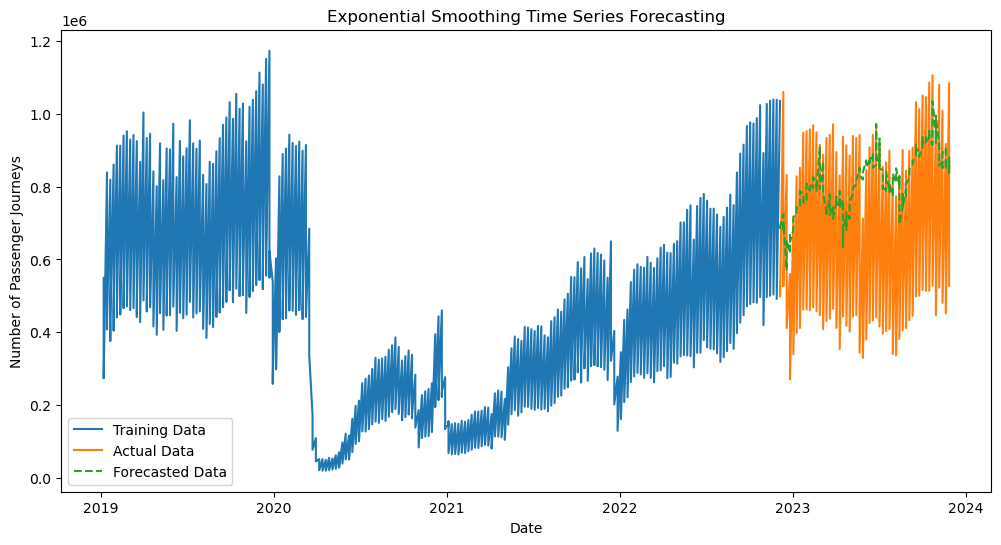

In [20]:
# Assuming 'Date' is a datetime column and 'VALUE' is the passenger journey data
df_ets = df.reset_index().rename(columns={'Date': 'ds', 'VALUE': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_ets) * 0.8)
train, test = df_ets.iloc[:train_size], df_ets.iloc[train_size:]

# Initialize Exponential Smoothing model
model = ExponentialSmoothing(train['y'], trend='add', seasonal='add', seasonal_periods=52)

# Fit the model with training data
fit_model = model.fit()

# Forecast future values
forecast_values = fit_model.forecast(steps=len(test))

# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Data')
plt.plot(test['ds'], forecast_values, label='Forecasted Data', linestyle='--')
plt.title('Exponential Smoothing Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.show()


Mean Squared Error (Random Forest): 27869832934.58527


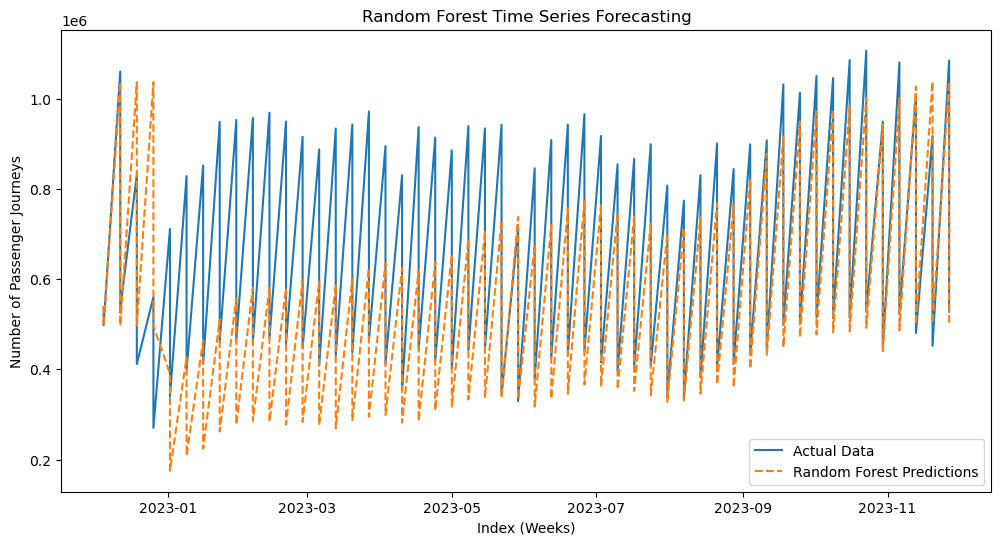

In [21]:
# Assuming 'Week', 'Year', 'Luas Line', and 'VALUE' are the relevant columns
df_rf = df[['Week', 'Year', 'Luas Line', 'VALUE']]

# Convert 'Luas Line' to numerical values (if needed)
df_rf['Luas Line'] = pd.Categorical(df_rf['Luas Line'])
df_rf['Luas Line'] = df_rf['Luas Line'].cat.codes

# Split the data into training and testing sets
train_size = int(len(df_rf) * 0.8)
train, test = df_rf.iloc[:train_size], df_rf.iloc[train_size:]

# Prepare features and target variables
X_train, y_train = train[['Week', 'Year', 'Luas Line']], train['VALUE']
X_test, y_test = test[['Week', 'Year', 'Luas Line']], test['VALUE']

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model with training data
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, rf_predictions)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Data')
plt.plot(test.index, rf_predictions, label='Random Forest Predictions', linestyle='--')
plt.title('Random Forest Time Series Forecasting')
plt.xlabel('Index (Weeks)')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.show()


Mean Squared Error (Linear Regression): 118888627103.16743


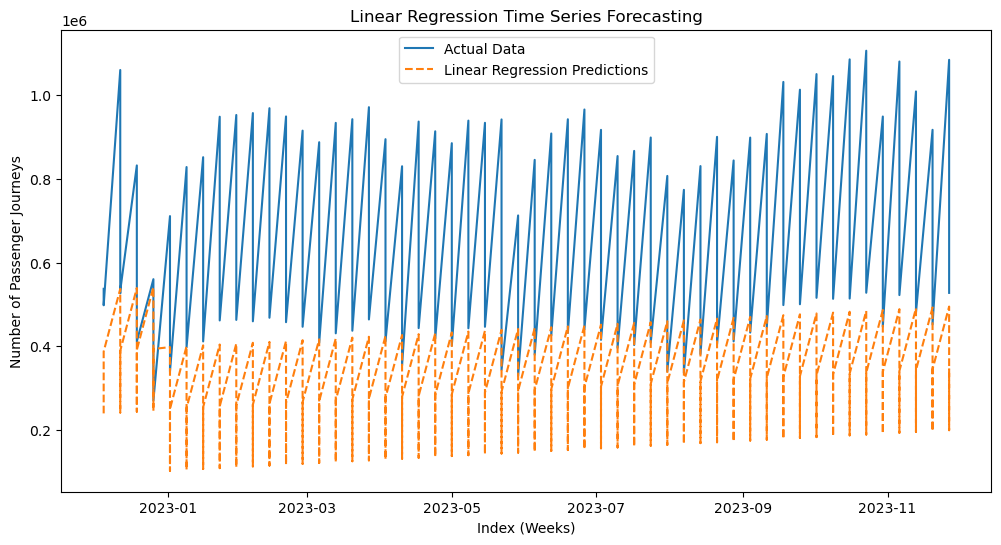

In [22]:
# Assuming 'Week', 'Year', 'Luas Line', and 'VALUE' are the relevant columns
df_lr = df[['Week', 'Year', 'Luas Line', 'VALUE']]

# Convert 'Luas Line' to numerical values (if needed)
df_lr['Luas Line'] = pd.Categorical(df_lr['Luas Line'])
df_lr['Luas Line'] = df_lr['Luas Line'].cat.codes

# Split the data into training and testing sets
train_size = int(len(df_lr) * 0.8)
train, test = df_lr.iloc[:train_size], df_lr.iloc[train_size:]

# Prepare features and target variables
X_train, y_train = train[['Week', 'Year', 'Luas Line']], train['VALUE']
X_test, y_test = test[['Week', 'Year', 'Luas Line']], test['VALUE']

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model with training data
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, lr_predictions)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Data')
plt.plot(test.index, lr_predictions, label='Linear Regression Predictions', linestyle='--')
plt.title('Linear Regression Time Series Forecasting')
plt.xlabel('Index (Weeks)')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.show()


Mean Squared Error (Decision Tree): 27533754210.541935


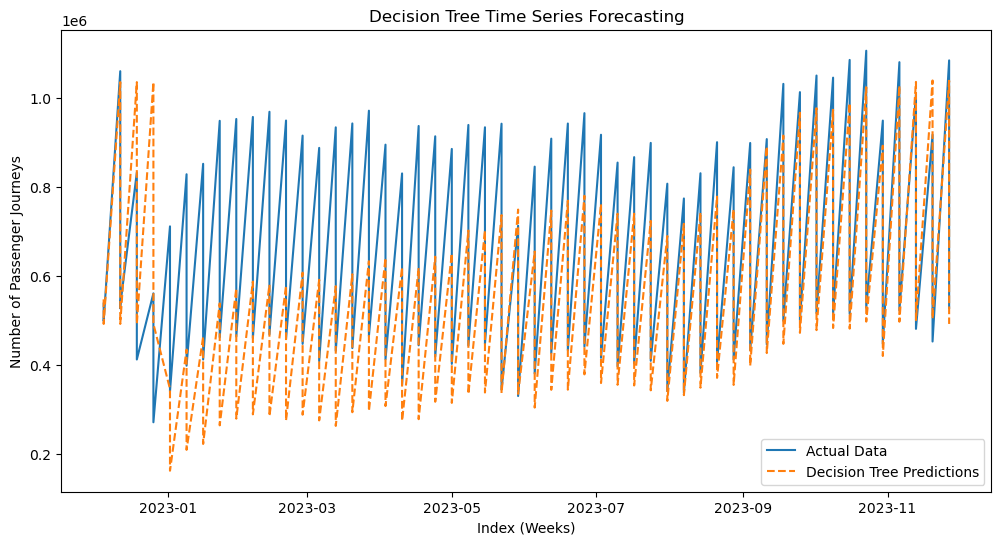

In [23]:
# Assuming 'Week', 'Year', 'Luas Line', and 'VALUE' are the relevant columns
df_dt = df[['Week', 'Year', 'Luas Line', 'VALUE']]

# Convert 'Luas Line' to numerical values (if needed)
df_dt['Luas Line'] = pd.Categorical(df_dt['Luas Line'])
df_dt['Luas Line'] = df_dt['Luas Line'].cat.codes

# Split the data into training and testing sets
train_size = int(len(df_dt) * 0.8)
train, test = df_dt.iloc[:train_size], df_dt.iloc[train_size:]

# Prepare features and target variables
X_train, y_train = train[['Week', 'Year', 'Luas Line']], train['VALUE']
X_test, y_test = test[['Week', 'Year', 'Luas Line']], test['VALUE']

# Initialize Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model with training data
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Calculate Mean Squared Error
mse_dt = mean_squared_error(y_test, dt_predictions)
print(f"Mean Squared Error (Decision Tree): {mse_dt}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Data')
plt.plot(test.index, dt_predictions, label='Decision Tree Predictions', linestyle='--')
plt.title('Decision Tree Time Series Forecasting')
plt.xlabel('Index (Weeks)')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.show()


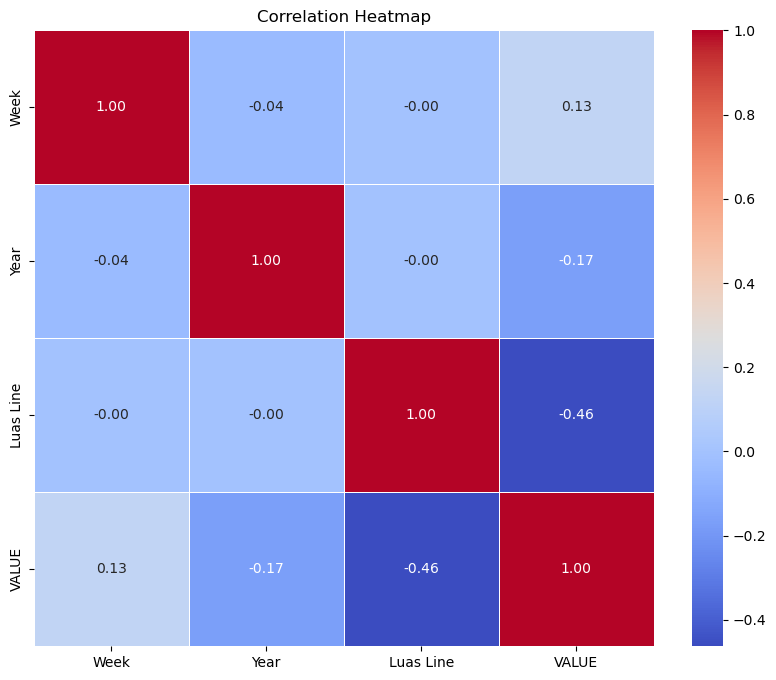

In [24]:
# Concatenate the training features and target variable for correlation analysis
df_heatmap = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


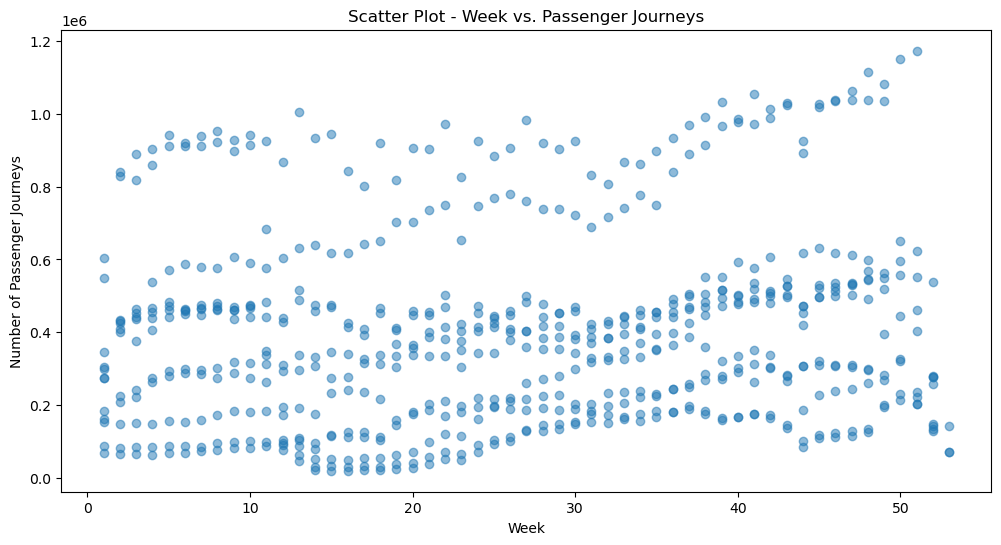

In [25]:
# Scatter plot for 'Week'
plt.figure(figsize=(12, 6))
plt.scatter(X_train['Week'], y_train, alpha=0.5)
plt.title('Scatter Plot - Week vs. Passenger Journeys')
plt.xlabel('Week')
plt.ylabel('Number of Passenger Journeys')
plt.show()

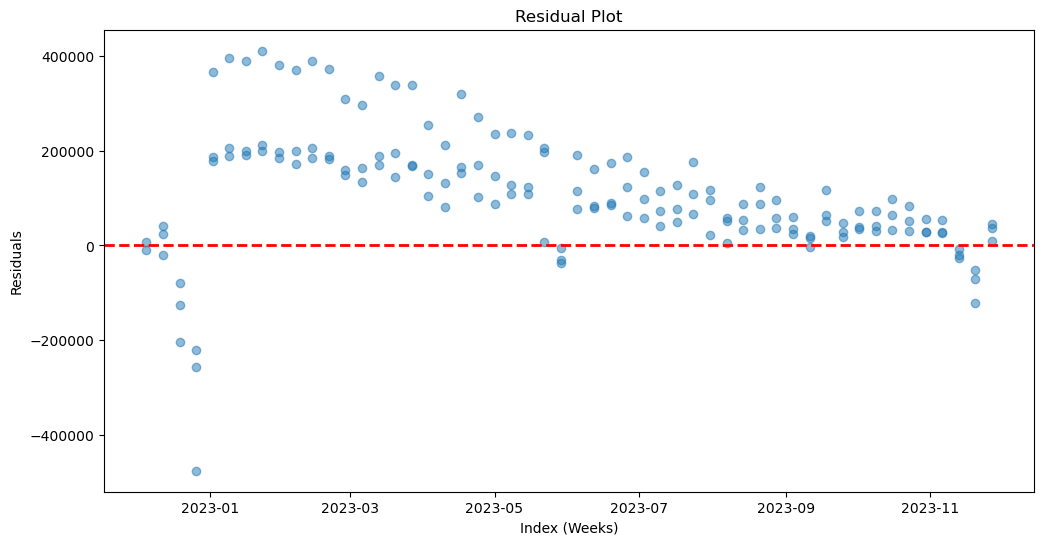

In [26]:
# Calculate residuals
residuals = y_test - dt_predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(test.index, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Index (Weeks)')
plt.ylabel('Residuals')
plt.show()


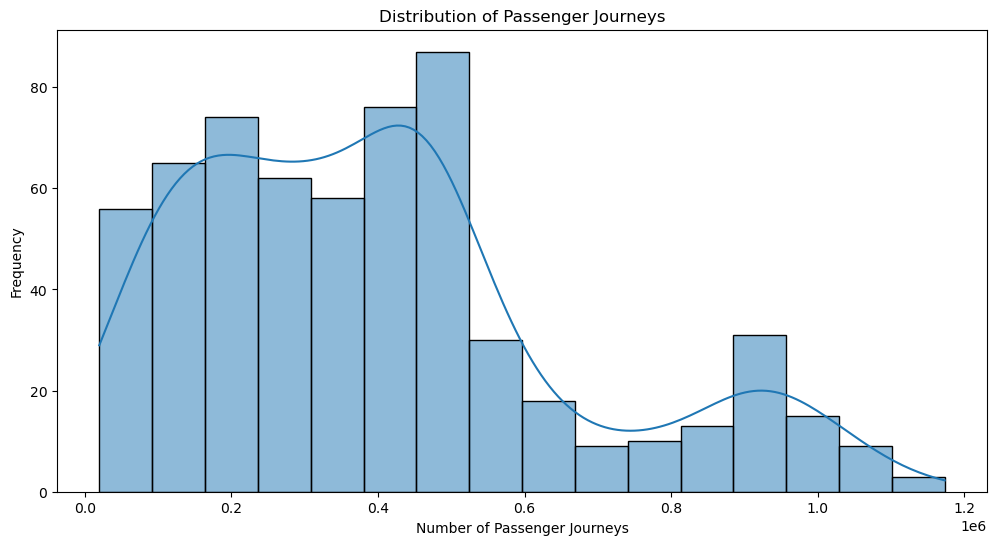

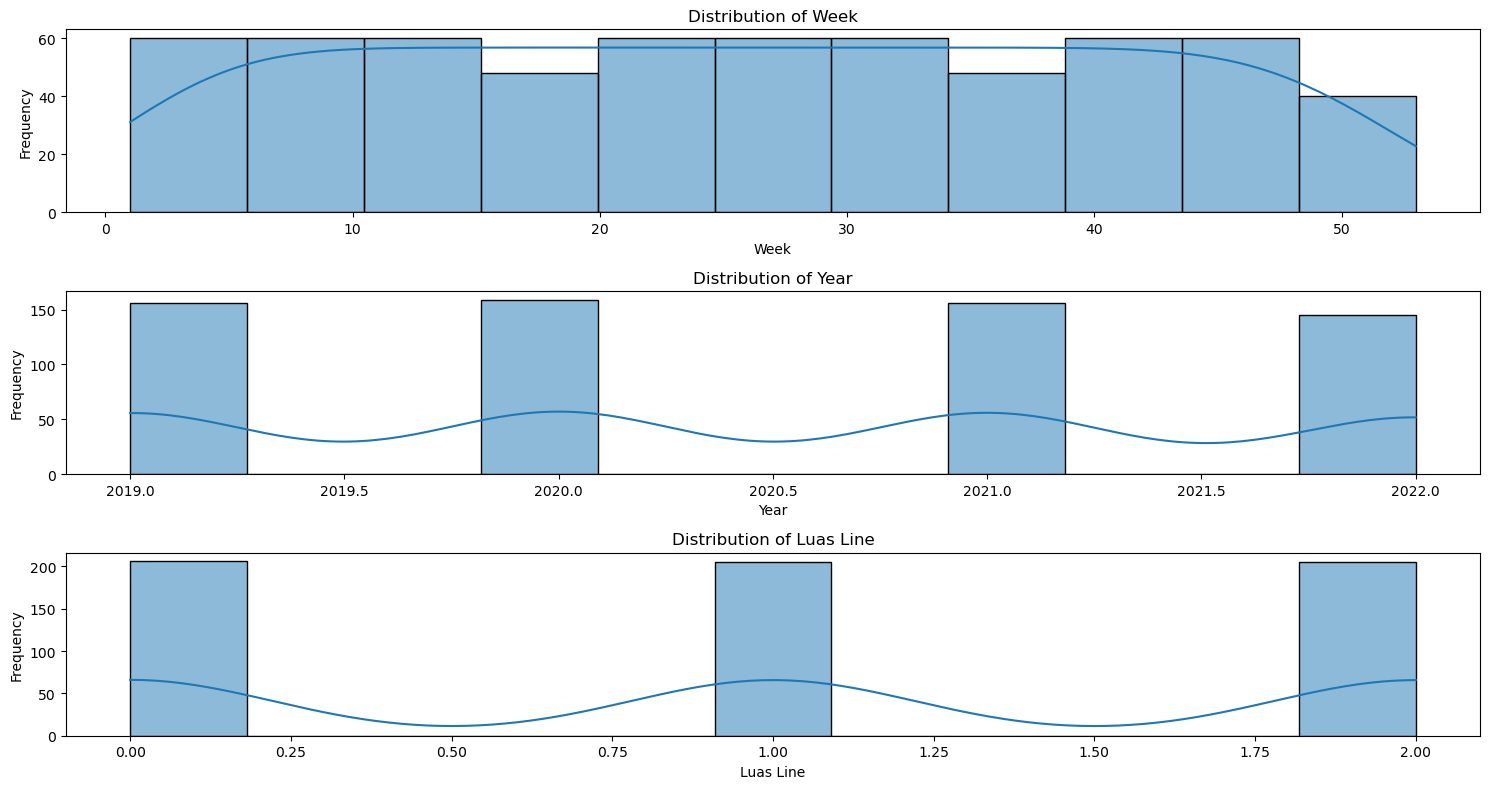

In [27]:
# Distribution plot for the target variable 'VALUE'
plt.figure(figsize=(12, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Passenger Journeys')
plt.xlabel('Number of Passenger Journeys')
plt.ylabel('Frequency')
plt.show()

# Distribution plots for features 'Week', 'Year', and 'Luas Line'
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
sns.histplot(X_train['Week'], kde=True)
plt.title('Distribution of Week')
plt.xlabel('Week')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
sns.histplot(X_train['Year'], kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.histplot(X_train['Luas Line'], kde=True)
plt.title('Distribution of Luas Line')
plt.xlabel('Luas Line')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


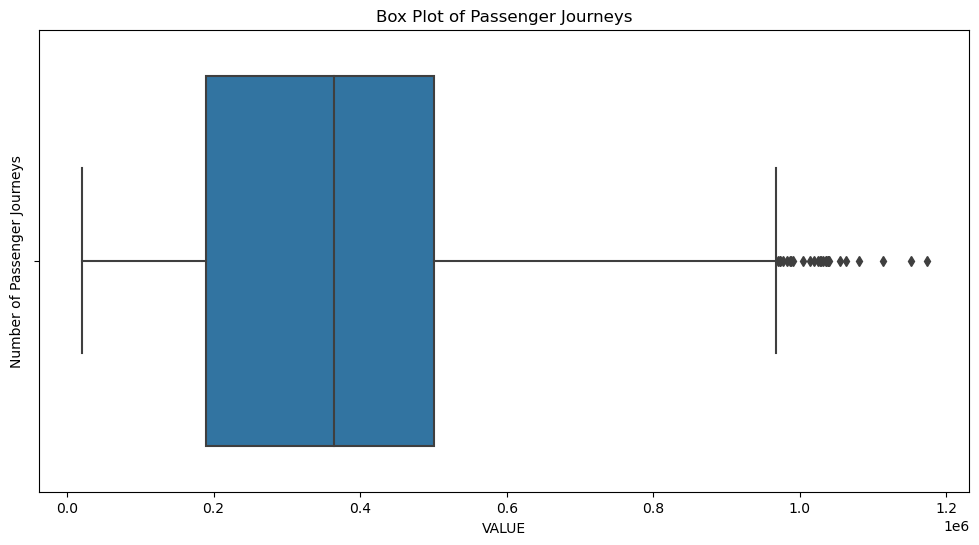

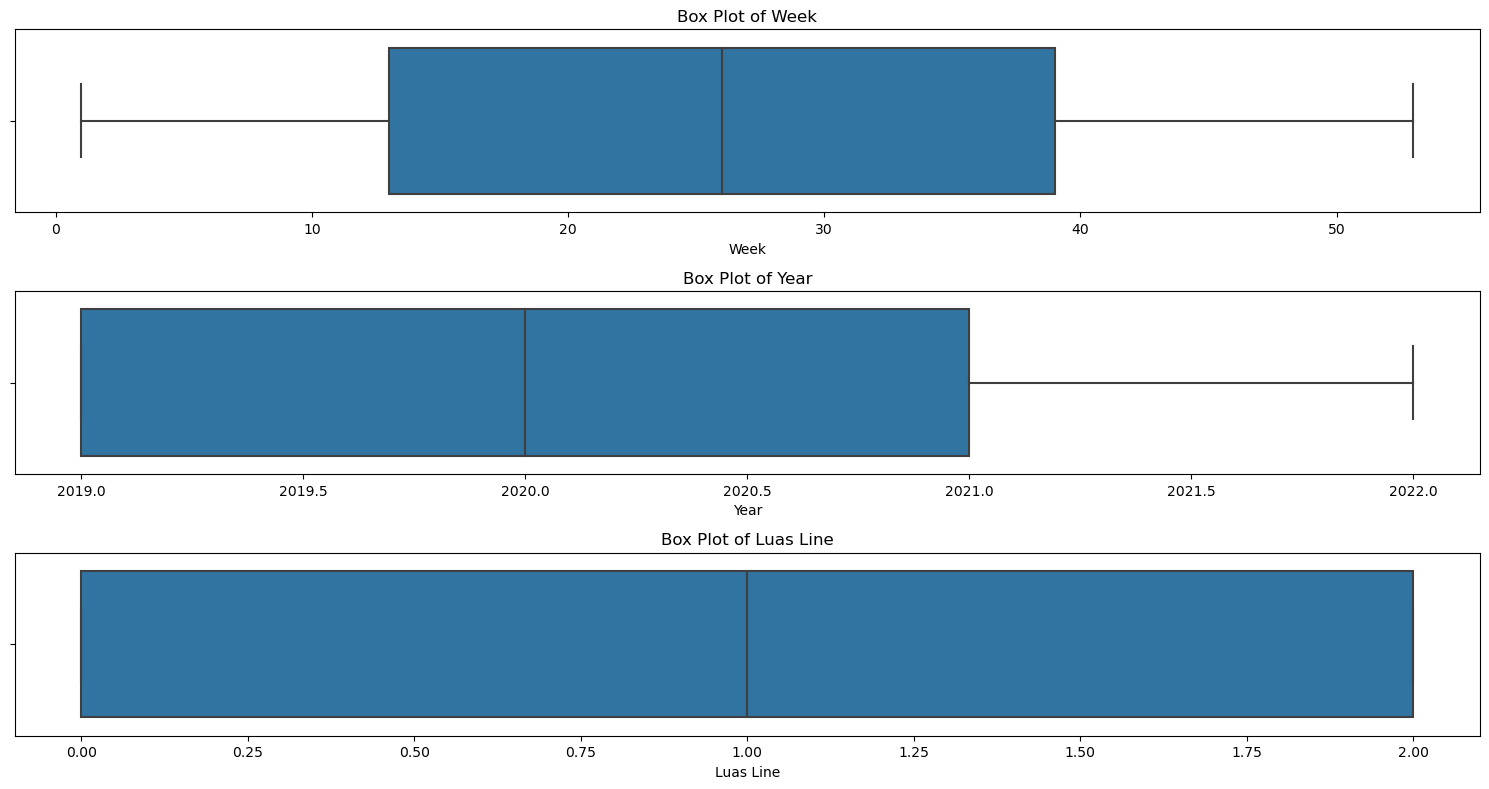

In [28]:
# Box plot for the target variable 'VALUE'
plt.figure(figsize=(12, 6))
sns.boxplot(y_train)
plt.title('Box Plot of Passenger Journeys')
plt.ylabel('Number of Passenger Journeys')
plt.show()

# Box plots for features 'Week', 'Year', and 'Luas Line'
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
sns.boxplot(X_train['Week'])
plt.title('Box Plot of Week')

plt.subplot(3, 1, 2)
sns.boxplot(X_train['Year'])
plt.title('Box Plot of Year')

plt.subplot(3, 1, 3)
sns.boxplot(X_train['Luas Line'])
plt.title('Box Plot of Luas Line')

plt.tight_layout()
plt.show()


In [29]:
df2 = pd.read_csv("Second_dataset.csv")

In [30]:
df2

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
190,TOA11C03,All Luas lines,2022,2022,09,September,Number,3811093
191,TOA11C03,All Luas lines,2022,2022,10,October,Number,4219124
192,TOA11C03,All Luas lines,2022,2022,11,November,Number,4375705
193,TOA11C03,All Luas lines,2022,2022,12,December,Number,4030698


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 771 entries, 2019-01-07 to 2023-11-27
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        771 non-null    object 
 1   Statistic Label  771 non-null    object 
 2   Week             771 non-null    int64  
 3   Year             771 non-null    int64  
 4   C03132V03784     771 non-null    object 
 5   Luas Line        771 non-null    object 
 6   UNIT             771 non-null    object 
 7   VALUE            771 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 54.2+ KB


In [32]:
df2.describe(include='all')

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
count,195,195,195.000000,195.000000,195,195,195,1.950000e+02
unique,3,3,NaN,NaN,13,13,1,NaN
top,TOA11C01,Red line,NaN,NaN,01,January,Number,NaN
freq,65,65,NaN,NaN,15,15,195,NaN
mean,NaN,NaN,2020.000000,2020.000000,NaN,NaN,NaN,3.436091e+06
std,NaN,NaN,1.417854,1.417854,NaN,NaN,NaN,6.434377e+06
min,NaN,NaN,2018.000000,2018.000000,NaN,NaN,NaN,8.935800e+04
25%,NaN,NaN,2019.000000,2019.000000,NaN,NaN,NaN,1.122000e+06
50%,NaN,NaN,2020.000000,2020.000000,NaN,NaN,NaN,1.846358e+06
75%,NaN,NaN,2021.000000,2021.000000,NaN,NaN,NaN,2.885632e+06


In [33]:
df2.shape

(195, 8)

In [34]:
df2.isnull().sum()

STATISTIC          0
Statistic Label    0
TLIST(A1)          0
Year               0
C01885V02316       0
Month              0
UNIT               0
VALUE              0
dtype: int64

In [37]:
# Descriptive statistics for passenger journeys
passenger_journeys_stats = df2['VALUE'].describe()

# Calculate mean, median, and standard deviation separately
mean_passenger_journeys = df2['VALUE'].mean()
median_passenger_journeys = df2['VALUE'].median()
std_passenger_journeys = df2['VALUE'].std()

# Display descriptive statistics
print("Descriptive Statistics for Passenger Numbers:")
print(passenger_journeys_stats)

# Display mean, median, and standard deviation
print("\nMean Passenger Numbers:", mean_passenger_journeys)
print("Median Passenger Numbers:", median_passenger_journeys)
print("Standard Deviation of Passenger Numbers:", std_passenger_journeys)


Descriptive Statistics for Passenger Numbers:
count    1.950000e+02
mean     3.436091e+06
std      6.434377e+06
min      8.935800e+04
25%      1.122000e+06
50%      1.846358e+06
75%      2.885632e+06
max      4.834723e+07
Name: VALUE, dtype: float64

Mean Passenger Numbers: 3436091.2461538464
Median Passenger Numbers: 1846358.0
Standard Deviation of Passenger Numbers: 6434377.058765079


In [38]:
unrealistic_values = df2[df2['VALUE'] < 0]
print("Unrealistic Values:")
print(unrealistic_values)

Unrealistic Values:
Empty DataFrame
Columns: [STATISTIC, Statistic Label, TLIST(A1), Year, C01885V02316, Month, UNIT, VALUE]
Index: []



Descriptive Statistics for Dataset 2:


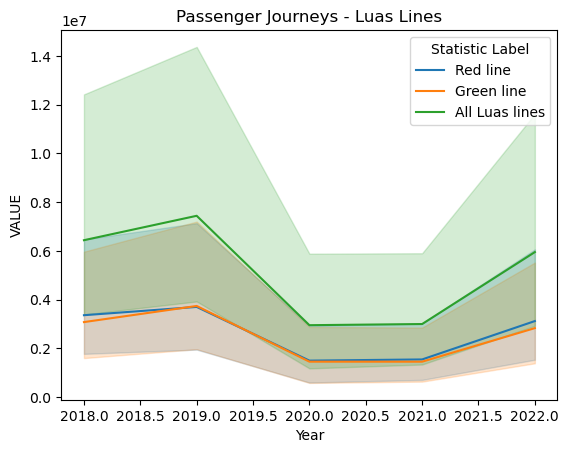

In [40]:
# Descriptive statistics
print("\nDescriptive Statistics for Dataset 2:")

# Visualizations
sns.lineplot(x='Year', y='VALUE', hue='Statistic Label', data=df2)
plt.title('Passenger Journeys - Luas Lines')
plt.show()
